In [201]:
# import 
import sys 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from os.path import basename
from re import sub
import import_ipynb
from SimpleSource_TRAK_base_tools import *
import subprocess
import statistics
from SimpleSource_TRAK_tools import *
import matplotlib
import time

### Build Simulations: 
#### 1. Build base simulation
#### 2. Build loop simulations over demit and avg 

In [202]:
## BUILD base simulation defintions: 
## inputs changing depending on optimization results: 
#fe_x = sys.argv[1]
#fe_y = sys.argv[2]
#an_x = sys.argv[3]
#an_y = sys.argv[4]
#subdir = sys.argv[5]

fe_x = 10
fe_y = 36   # +3 from the cathode surface emission! 
an_x = 77
an_y = 30
FE_potential = -1700
subdir = 'simple_source_17_03_2024_COPY5_FEPOT'
#60

fe_x_str = str(fe_x).replace('.', '')
fe_y_str = str(fe_y).replace('.', '')
an_x_str = str(an_x).replace('.', '')
an_y_str = str(an_y).replace('.', '')
FE_potential_str = str(FE_potential).replace('.', '')


## constant inputs:
## inputs for getting estat solution
meshfile_estat = '%s/mesh_%s_%s_%s_%s_%s' %(subdir, fe_x_str, fe_y_str, an_x_str, an_y_str, FE_potential_str) # define mesh file for estat
estatfile = '%s/estat_%s_%s_%s_%s_%s' %(subdir, fe_x_str, fe_y_str, an_x_str, an_y_str, FE_potential_str) # define estat file 
potential = '-1.36E+03' # define the potential for the estat solution

## inputs for getting permag solution
meshfile_permag = '%s/mesh_permag' %subdir # define the mesh file for permag
permagfile = '%s/permag' %subdir # define permag file

## inputs for getting TRAK base solution
trakfile = '%s/firstfile' %subdir

In [203]:
# Getting estat solution: 
# create and run files (.min, .mls, .mou, .ein, .els, .eou)
run_mesh_estat(fe_x, fe_y, an_x, an_y, meshfile_estat)  # make and run the mesh for estat
run_estat(estatfile, meshfile_estat, potential, FE_potential) # make and run the .ein file for estat

In [204]:
# Getting permag solution:
# create and run files (.min, .mls, .mou, .pin, .pls, .pou)
run_mesh_permag(meshfile_permag) # make and run the mesh for permag
run_permag(permagfile, meshfile_permag) # make and run the .pin for permag

In [205]:
# Getting TRAK base solution:
# create and run files (.tin, .tls, .tou)
run_trak(estatfile, permagfile, trakfile)

In [206]:
## Cartesian product of avg and demit 
#avg_list = ['0.08', '0.14', '0.20', '0.26']
#demit_list = ['0.15', '0.25','0.35', '0.45']
# avg_list = ['0.08', '0.24']
# demit_list = ['0.10', '0.30']
avg_list = ['0.08']
demit_list = ['0.20']  # 0.16 from the increase in the mesh sizing 
file_list = []
for i in avg_list: 
    avg_float = float(i)
    avg_file = i.replace('.', '')
    for j in demit_list: 
        demit_float = float(j)
        demit_file = j.replace('.', '')
        avg_demit_ncycle_func('%s' %trakfile,
                              '%s/a%sd%s_%s_%s_%s_%s_%s' %(subdir, avg_file, demit_file, fe_x_str, fe_y_str, an_x_str, an_y_str, FE_potential), 
                             avg_float, demit_float, 50)
        file_list.append('%s/a%sd%s_%s_%s_%s_%s_%s' %(subdir, avg_file, demit_file, fe_x_str, fe_y_str, an_x_str, an_y_str, FE_potential))
        
print(file_list)
print(len(file_list))

['simple_source_17_03_2024_COPY5_FEPOT/a008d020_10_36_77_30_-1700']
1


In [207]:
run_parallel(file_list, '3', 'TRAK')

### Analyze Simulations: 
#### 1. Analyze simulations from demit loops 
#### 2. Analyze simulations from avg loops 
#### 3. Combine them for total output of average current and flatness (check on how to do this)

In [208]:
### Will want to figure out how to go through this analysis part for this setup!!! 

[['simple_source_17_03_2024_COPY5_FEPOT/a008d020_10_36_77_30_-1700', True, 0.027698]]
1
File:  simple_source_17_03_2024_COPY5_FEPOT/a008d020_10_36_77_30_-1700      Final Current: 0.027698


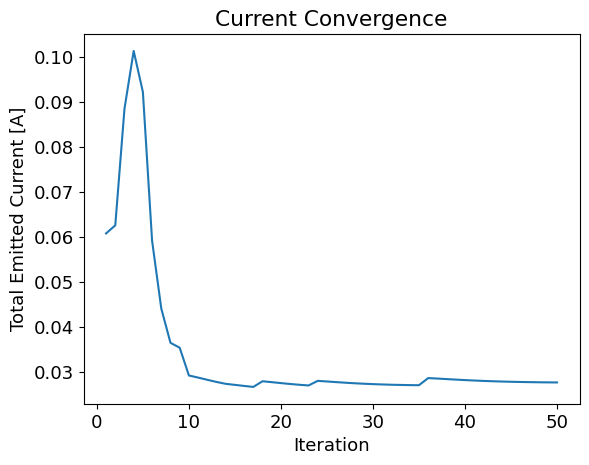

I = 0.0277 ± 0.0000 A
current density mean:  65.0383 A/m^2
max Jz range:  2.448 A/m^2


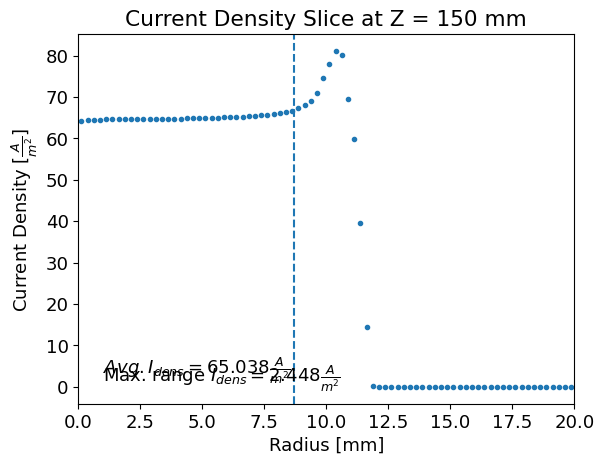

[['simple_source_17_03_2024_COPY5_FEPOT/a008d020_10_36_77_30_-1700', True, 0.027698]]
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!
ERROR - couldn't find file!


In [209]:
#time.sleep(60) # Sleep for 60 seconds
conv_condition = 0.06
density_slice = 150
radius = 8.7

plt.rcParams['font.size'] = '13'

# get list of files where the current converges. 
convergence = converg_func(file_list, conv_condition)
converging_file_list = convergence[1]
print(len(converging_file_list))

# get and plot the current convergence of the converging simulations 
current_list = []
converging_list_base = []
for i in converging_file_list: 
    converging_list_base.append(i[0])
    current_list.append(current_conv(i[0]))
    plt.legend().remove()
    
mean = np.mean(current_list)
stdev = np.std(current_list)
plt.show()
print('I = %.4f \u00B1 %.4f A' %(mean, stdev))
    
# ## Get and plot the current density of the converging simulations
# for i in converging_file_list: 
#    cdensity(i[0], density_slice)
# plt.xlim(0, 20)
# plt.axvline(8.7, ls = '--')
# plt.text(1, 14.5, r'$Avg. I_{dens} = %.3f \frac{A}{m^2} $' %(cdens_avg), fontsize = 13)
# plt.text(1, 12.5, r'Max. range $I_{dens} = %.3f \frac{A}{m^2} $' %(Jz_range_max), fontsize = 13)
# plt.title('Current Density Slice at Z = 150 mm')
# plt.show()

## do the flatness analysis
flatness_analysis = flatness(converging_list_base, density_slice, radius)
cdens_list = []
Jz_range_list = []
for i in flatness_analysis: 
    cdens_list.append(i[1])
    Jz_range_list.append(i[2])

# print(len(cdens_list))
# print(len(Jz_range_list))
if len(cdens_list) > 1: 
    cdens_avg = np.mean(cdens_list)
    Jz_range_max = max(Jz_range_list)
else:
    cdens_avg = cdens_list[0]
    Jz_range_max = Jz_range_list[0]

print("current density mean: ", cdens_avg, 'A/m^2')
print("max Jz range: ", Jz_range_max,  'A/m^2')


## Get and plot the current density of the converging simulations
for i in converging_file_list: 
   cdensity(i[0], density_slice)
plt.xlim(0, 20)
plt.axvline(8.7, ls = '--')
plt.text(1, 3, r'$Avg. I_{dens} = %.3f \frac{A}{m^2} $' %(cdens_avg), fontsize = 13)
plt.text(1, 1, r'Max. range $I_{dens} = %.3f \frac{A}{m^2} $' %(Jz_range_max), fontsize = 13)
plt.title('Current Density Slice at Z = 150 mm')
plt.show()


##### Getting the electric field results! ########
E_field_line_loc = [-10, 0, 1.5, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 10, 33.5, 33.8, 34.1, 34.4, 34.7, 35.0, 35.3]
print(converging_file_list)
max_e_fields = []
for i in converging_file_list:
    for val in E_field_line_loc:
        max_e_field_output = E_field_line(i[0], val, plots = False)
        max_e_fields.append([max_e_field_output, val])
        
def Extract(first):
    return [item[0] for item in first]
 
# print(max_e_fields)
# max_field_sim = max(Extract(max_e_fields))
# print('maximum electric field calculated: ', max_field_sim)

# for i in max_e_fields: 
#     print(i)
#     if max_field_sim in i[0]: 
#        print('max field and slice: ')
#        print(i)